In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras

* mnist dataset is already devided into 4 datasets, namely training images, training labels, test image and test labels

In [114]:
(X_train_0,y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of training data set: ", X_train_0.shape, y_train_0.shape)
print()
print("Shape of testing data set: ", X_test_0.shape, y_test_0.shape)
print()
print("Ratio of test size: ", round((len(X_test_0) / len(X_train_0)),2))

number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1]
unique_labels = len(np.unique(y_train_0))

print()
print("Number of input features: ", number_of_features)
print()
print("Number of unique labels: ", unique_labels)

Shape of training data set:  (60000, 28, 28) (60000,)

Shape of testing data set:  (10000, 28, 28) (10000,)

Ratio of test size:  0.17

Number of input features:  784

Number of unique labels:  10


In [115]:
# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(X_train_0), X_train_0[0].shape)

60000 (28, 28)


* Unique labels for the dataset

In [116]:
np.unique(y_train_0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

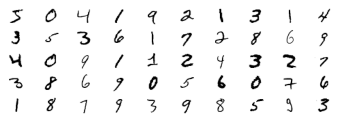

In [117]:
for i in range(50):
    ax = plt.subplot(10,10,i+1)
    ax.axis('off')
    plt.imshow(X_train_0[i], cmap='Greys')

### Problems With This Data

1. There are (at least) two problems with this data as it is currently formatted:

    * The input data is formatted as a 2D array, but our deep neural network needs to data as a 1D vector.
    * This is because of how deep neural networks are constructed, it is simply not possible to send anything but a vector as input.
    * These vectors can be/represent anything, but from the computer's perspective they must be a 1D vector.

2. Our labels are numbers, but we're not performing regression. We need to use a 1-hot vector encoding for our labels.
    * This is important because if we use the number values we would be training our network to think of these values as continuous.
    * If the digit is supposed to be a 2, guessing 1 and guessing 9 are both equally wrong.
    * Training the network with numbers would imply that a prediction of 1 would be "less wrong" than a prediction of 9, when in fact both are equally wrong.



In [118]:
print("Before reshape, the shape of training images: ", X_train.shape)
# In the images, there are 6000 of 28x28 matrices, now in order to change it to vector, we will make 28x28 matrix to a single vector of (28*28) rows
X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)
print()
print("After reshape, the shape of training images: ", X_train.shape)

Before reshape, the shape of training images:  (60000, 784)

After reshape, the shape of training images:  (60000, 784)


In [125]:
# Create 1-hot encoded vectors using to_categorical

y_train = keras.utils.to_categorical(y_train_0, num_classes = unique_labels )
y_test = keras.utils.to_categorical(y_test_0, num_classes = unique_labels )


### Neural Network

This neural network will have three layers; input layer, hidden layer, output layer. This data has 784 columns or features, hence input layer will have 784 features, and there are 10 possible unique outputs, hence will have 10 nodes at the output. The hidden layer number of neurons is our choice, for a start, we will choose 30 neurons in hidden layer.

In [126]:
# Libraries for neural network creation.
# sequence is required to create a series of layers
# for adding hidden layers, we need Dense
from keras.models import Sequential
from keras.layers import Dense

In [127]:
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units = 30, 
               activation = 'sigmoid',
               input_shape=(number_of_features,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units = unique_labels,
               activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [128]:
X_train.shape[1]

784


## Compiling and Training a Model¶

Our model must be compiled and trained before it can make useful predictions. Models are trainined with the training data and training labels. During this process Keras will use an optimizer, loss function, metrics of our chosing to repeatedly make predictions and recieve corrections. The loss function is used to train the model, the metrics are only used for human evaluation of the model during and after training.

Training happens in a series of epochs which are divided into a series of rounds. Each round the network will recieve batch_size samples from the training data, make predictions, and recieve one correction based on the errors in those predictions. In a single epoch, the model will look at every item in the training set exactly once, which means individual data points are sampled from the training data without replacement during each round of each epoch.

During training, the training data itself will be broken into two parts according to the validation_split parameter. The proportion that you specify will be left out of the training process, and used to evaluate the accuracy of the model. This is done to preserve the test data, while still having a set of data left out in order to test against — and hopefully prevent — overfitting. At the end of each epoch, predictions will be made for all the items in the validation set, but those predictions won't adjust the weights in the model. Instead, if the accuracy of the predictions in the validation set stops improving then training will stop early, even if accuracy in the training set is improving.


In [129]:
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [130]:
history = model.fit(x = X_train,
                    y = y_train,
                    verbose=2,
                    batch_size=100,
                   epochs=10,
                   validation_split=0.10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 1.3105 - accuracy: 0.6623 - val_loss: 0.8782 - val_accuracy: 0.8377
Epoch 2/10
 - 1s - loss: 0.8171 - accuracy: 0.8281 - val_loss: 0.6651 - val_accuracy: 0.8713
Epoch 3/10
 - 1s - loss: 0.6572 - accuracy: 0.8571 - val_loss: 0.5352 - val_accuracy: 0.8958
Epoch 4/10
 - 1s - loss: 0.5680 - accuracy: 0.8688 - val_loss: 0.4630 - val_accuracy: 0.9008
Epoch 5/10
 - 1s - loss: 0.5071 - accuracy: 0.8794 - val_loss: 0.4228 - val_accuracy: 0.9060
Epoch 6/10
 - 1s - loss: 0.4684 - accuracy: 0.8848 - val_loss: 0.3806 - val_accuracy: 0.9135
Epoch 7/10
 - 1s - loss: 0.4435 - accuracy: 0.8900 - val_loss: 0.3763 - val_accuracy: 0.9120
Epoch 8/10
 - 1s - loss: 0.4212 - accuracy: 0.8925 - val_loss: 0.3567 - val_accuracy: 0.9107
Epoch 9/10
 - 1s - loss: 0.4026 - accuracy: 0.8959 - val_loss: 0.3301 - val_accuracy: 0.9188
Epoch 10/10
 - 1s - loss: 0.3915 - accuracy: 0.8972 - val_loss: 0.3294 - val_accuracy: 0.9170


## Evaluating Our Model

Now that we've trained our model, we want to evaluate its performance. We're using the "test data" here although in a serious experiment, we would likely not have done nearly enough work to warrent the application of the test data. Instead, we would rely on the validation metrics as a proxy for our test results until we had models that we believe would perform well.

Once we evaluate our model on the test data, any subsequent changes we make would be based on what we learned from the test data. Meaning, we would have functionally incorporated information from the test set into our training procedure which could bias and even invalidate the results of our research. In a non-research setting the real test might be more like putting this feature into production.

Nevertheless, it is always wise to create a test set that is not used as an evaluative measure until the very end of an experimental lifecycle. That is, once you have a model that you believe should generalize well to unseen data you __should__ test it on the test data to test that hypothosis. If your model performs poorly on the test data, you'll have to reevaluate your model, training data, and procedure.


In [131]:
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test )
print()
print("Testing data loss value: ", round(loss, 2))
print()
print('Testing data accuracy: ', round(accuracy, 2))

10000/10000 [==============================] - 0s 14us/step

Testing data loss value:  0.38

Testing data accuracy:  0.9


## Visualizing Results

### Model Accuracy

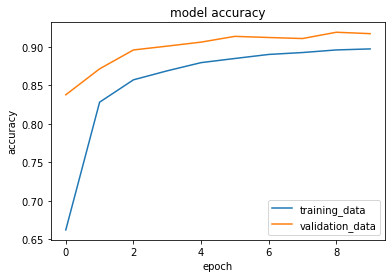

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_data', 'validation_data'], loc='best')

### Model Loss

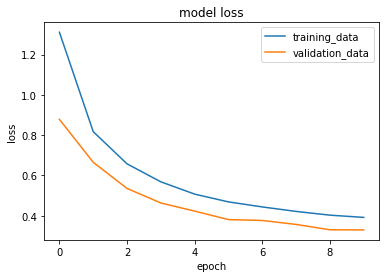

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_data', 'validation_data'], loc='best')

In [135]:


from numpy import argmax

# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = model.predict(X_test)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}



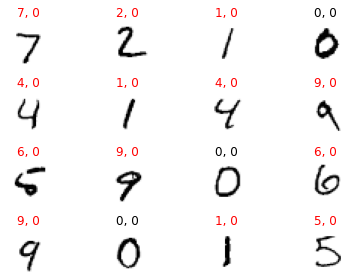

In [137]:
# Repeatedly running this cell will page through the predictions
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(X_test_0[i + page], cmap='Greys')
    prediction = argmax(predictions[i + page])
    true_value = argmax(y_test_0[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()

### Try with a new model

In [138]:
model = Sequential()

model.add(Dense(units = 50, 
               activation = 'sigmoid',
               input_shape=(number_of_features,)))

model.add(Dense(units = 30))
model.add(Dense(units = unique_labels,
               activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    verbose=2,
                    batch_size=100,
                   epochs=50,
                   validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
 - 1s - loss: 1.1433 - accuracy: 0.6929 - val_loss: 0.6298 - val_accuracy: 0.8564
Epoch 2/50
 - 1s - loss: 0.5615 - accuracy: 0.8551 - val_loss: 0.4358 - val_accuracy: 0.8906
Epoch 3/50
 - 1s - loss: 0.4420 - accuracy: 0.8802 - val_loss: 0.3621 - val_accuracy: 0.9037
Epoch 4/50
 - 1s - loss: 0.3886 - accuracy: 0.8914 - val_loss: 0.3363 - val_accuracy: 0.9038
Epoch 5/50
 - 1s - loss: 0.3585 - accuracy: 0.8970 - val_loss: 0.3142 - val_accuracy: 0.9119
Epoch 6/50
 - 1s - loss: 0.3364 - accuracy: 0.9036 - val_loss: 0.2899 - val_accuracy: 0.9141
Epoch 7/50
 - 1s - loss: 0.3175 - accuracy: 0.9087 - val_loss: 0.2793 - val_accuracy: 0.9210
Epoch 8/50
 - 1s - loss: 0.3039 - accuracy: 0.9126 - val_loss: 0.2670 - val_accuracy: 0.9248
Epoch 9/50
 - 1s - loss: 0.2929 - accuracy: 0.9157 - val_loss: 0.2617 - val_accuracy: 0.9220
Epoch 10/50
 - 1s - loss: 0.2862 - accuracy: 0.9184 - val_loss: 0.2595 - val_accuracy: 0.9246
Epoch 11/50
 - 1s - 

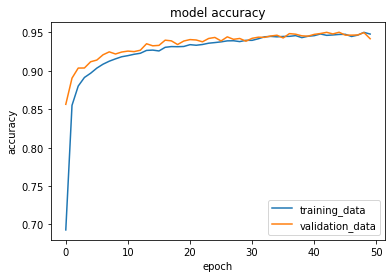

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_data', 'validation_data'], loc='best')


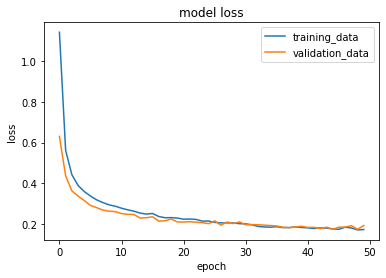

In [141]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_data', 'validation_data'], loc='best')

In [143]:
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test )
print()
print("Testing data loss value: ", round(loss, 2))
print()
print('Testing data accuracy: ', round(accuracy, 2))

10000/10000 [==============================] - 0s 16us/step

Testing data loss value:  0.19

Testing data accuracy:  0.94


In [149]:

from numpy import argmax

# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = model.predict(X_test)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}


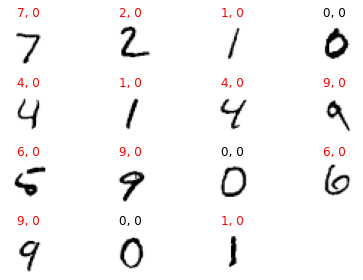

In [151]:
# Repeatedly running this cell will page through the predictions
for i in range(15):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(X_test_0[i + page], cmap='Greys')
    prediction = argmax(predictions[i + page])
    true_value = argmax(y_test_0[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()